## 3. Running random simulations in numpy


### Section covers:
- Basic usage of the NumPy library
- Simulating random observations using NumPy
- Visualizing simulated data
- Estimating unknown probabilities from simulated observations

We will use NumPy to analyze billions of random data points, these random observations will allow us to learn hidden probabilities.

In [25]:
# Import NumPy
import numpy as np
import matplotlib.pyplot as plt

We use the `np.random` module for random simulations. E.g `np.random.randint(1,7)` produces a random integer between 1 and 6. It chooses the six possible integers with equal likelihood.

In [20]:
die_roll = np.random.randint(1,7)
assert 1 <= die_roll <= 6

To ensure consisteny and be able to recreate experiments, we call `np.random.seed(0)`; this method call makes sequences of randomly chosen values reproducible. After the call, we can directly guarantee that our first three dice rolls will land on values 5, 6 and 1.

In [21]:
# Seeding reproduible random die rolls
np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

Adjusting the inputted _x_ into`np.random.randint(0, x)` allows us to simulate any number of discrete outcomes. For instance, setting x to 52 will simulate any randomly drawn card. Alternatively, setting x to 2 will simulate a single flip of an unbiased coin. Let's generate that coin-flip by calling `np.random.rantin(0, 2)`; this method call returns a random value equal to either 0 or 1. We assume that 0 stands for tails and 1 stands for heads.


In [22]:
# Simulating one fair coin flip
np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


Next we simulate a sequence of 10 coin flips and then compute the observed frequency of heads.

In [23]:
# Simulating 10 fair coin flips
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0,2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


The observed frequency is 0.8, which is quite disproportionate to the actual probability of heads. However, as we have learned, 10 coin flips will produce such extreme frequencies approximately 10% of the time. More coin flips are required to estimate the actual probability.

Let's see what happens when we flip the coin 1000 times. After each flip, we record the total frequency of heads observed in the sequence. ONce the coin flips are completed, we visualize our output by plotting the coin-flip count versus the frequency count. Our plot also includes a horizontal line along the actual probability of 0.5. We generate that line by calling `plt.axhline(0.5, color='k')`.

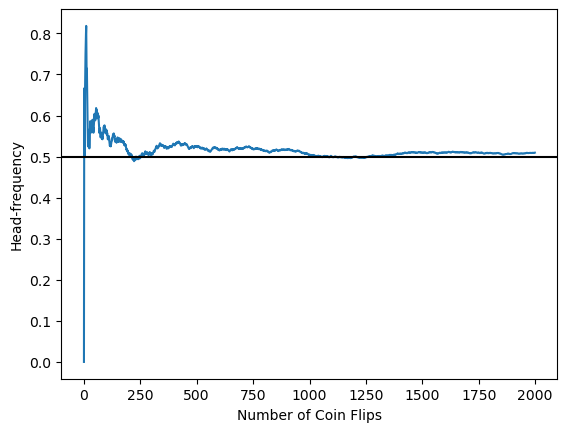

In [27]:
# Plotting simulated fair coin-flip frequencies

np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(2000):
    coin_flips.append(np.random.randint(0,2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(2000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-frequency')
plt.show()